# **Glassdoor Project**

**Project Type -** EDA and Regression

**Contribution** - Individual

# **Project Summary**

The Glassdoor Jobs dataset provides a comprehensive view of tech job postings from 2017 to 2018, offering valuable insights into salary trends, job requirements, and company profiles across various industries and locations. The dataset includes key attributes such as job title, salary estimate, company size, location, industry, and detailed job descriptions. Through exploratory data analysis and regression modeling, this project aimed to uncover patterns in compensation structures, understand the impact of experience, geography, and company characteristics on salaries, and build predictive models for salary estimation. Several preprocessing steps were applied to clean and structure the data, including parsing salary ranges, extracting meaningful features from text, and encoding categorical variables. Multivariate visualizations revealed significant differences in pay by job role, seniority level, and city, with statistical tests confirming that senior roles earn significantly higher salaries. Multiple machine learning models were evaluated, with Random Forest Regressor performing best after hyperparameter tuning. The model demonstrated strong predictive capability, making it suitable for deployment in real-world applications such as salary benchmarking and job recommendation systems. This project serves as a robust foundation for professionals, recruiters, and organizations to make informed, data-driven decisions regarding compensation and talent acquisition in the competitive tech industry.

# **GitHub Link**

# **Problem Statement**

**Business Objectives**
• For Job Seekers: Helps professionals make informed career decisions by understanding expected
salary ranges for different roles.
• For Employers: Assists companies in setting competitive salaries to attract and retain top talent.
• For Analysts & Researchers: Provides data-driven insights into salary trends based on industry,
experience, and geography.
• For Recruiters: Aids in benchmarking salaries and ensuring fair compensation practices.


**Problem Statement**
• How does salary vary by job position (e.g.. Data Scientist vs. Software Engineer vs. DevOps
Engineer)?
• What is the impact of company size on salary levels?
• How do salaries differ by location (e.g., San Francisco vs. Austin vs. New York)?
• Can we build a predictive model to estimate salaries based on job attributes?
By analyzing this dataset, we can predict salary ranges, uncover market trends, and provide insights to tech
professionals and organizations.

# **Code Implementation**

## **1. Data Overview and Initial Exploration**

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Dataset Loading
df = pd.read_csv('glassdoor_jobs.csv')


### Dataset First View

In [3]:
# Dataset First View
print(df.head())

   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.

### Dataset Rows and Columns count

In [4]:
# Dataset Rows and Columns count
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 956, Columns: 15


### Dataset Information

In [5]:
# Dataset Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB
None


### Duplicate Values

In [6]:
# Duplicate Values
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Missing Values/Null Values

In [7]:
# Missing Values / Null Values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


### What did you know about your dataset?

The dataset contains job postings from Glassdoor with salary estimates, job descriptions,
company info, and more. There are issues like missing column names, inconsistent formatting,
and nulls that need to be addressed.

## **2. Feature Analysis and Statistical Profiling**

### Variables Description

In [8]:
# Variables Description
print("\nVariables in the dataset:")
for col in df.columns:
    print(f"- {col}")


Variables in the dataset:
- Unnamed: 0
- Job Title
- Salary Estimate
- Job Description
- Rating
- Company Name
- Location
- Headquarters
- Size
- Founded
- Type of ownership
- Industry
- Sector
- Revenue
- Competitors


### Check Unique Values for each variable

In [9]:
# Check Unique Values for each variable
for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique()[:5])


Unique values in 'Unnamed: 0':
[0 1 2 3 4]

Unique values in 'Job Title':
['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst']

Unique values in 'Salary Estimate':
['$53K-$91K (Glassdoor est.)' '$63K-$112K (Glassdoor est.)'
 '$80K-$90K (Glassdoor est.)' '$56K-$97K (Glassdoor est.)'
 '$86K-$143K (Glassdoor est.)']

Unique values in 'Job Description':
['Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and h

## **3. Data Wrangling**

In [10]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('glassdoor_jobs.csv')

# Remove rows where Salary Estimate is '-1'
df = df[df['Salary Estimate'] != '-1']

# Create flags for hourly wage and employer provided salary
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

# Clean salary estimate
def clean_salary(salary_str):
    # Remove everything after '('
    salary_str = salary_str.split('(')[0]
    # Remove $, K, per hour, employer provided salary, and strip whitespace
    salary_str = salary_str.replace('$', '').replace('K', '').lower().replace('per hour', '').replace('employer provided salary:', '').strip()
    return salary_str

# Apply cleaning function
df['cleaned_salary'] = df['Salary Estimate'].apply(clean_salary)

# Split min and max salary
df[['min_salary', 'max_salary']] = df['cleaned_salary'].str.split('-', expand=True)

# Convert to numeric, coerce errors to NaN
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')

# Fill NA and calculate avg salary
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

# Drop intermediate columns
df.drop(['cleaned_salary'], axis=1, inplace=True)

# Company name cleanup
df['company_txt'] = df.apply(lambda x: x['Company Name'].split('\n')[0] if x['Rating'] >= 0 else x['Company Name'], axis=1)

# Job state
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

# Company age
df['company_age'] = df['Founded'].apply(lambda x: 2024 - x if x > 0 else np.nan)

# Competitor count
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x not in ['-1', -1, np.nan] else 0)

# Description length
df['desc_len'] = df['Job Description'].str.len()

# Drop irrelevant columns
cols_to_drop = ['Company Name', 'Headquarters', 'Industry', 'Sector', 'Competitors', 'Revenue']
df.drop(cols_to_drop, axis=1, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

print("Data wrangling completed successfully.")

Data wrangling completed successfully.


### What all manipulations have you done and insights you found?

1.Created avg_salary by parsing salary ranges.

2.Extracted city and state from location.

3.Added number of competitors (num_comp) and job description length (sdesc_len).

4.Derived company age from founding year.

5.Cleaned up messy fields like size, revenue, and company name.

## **4. Exploratory Data Analysis: Multivariate Visualization**

In [11]:
# Set style
sns.set(style="whitegrid")

### *Chart -1 : Distribution of Average Salaries*

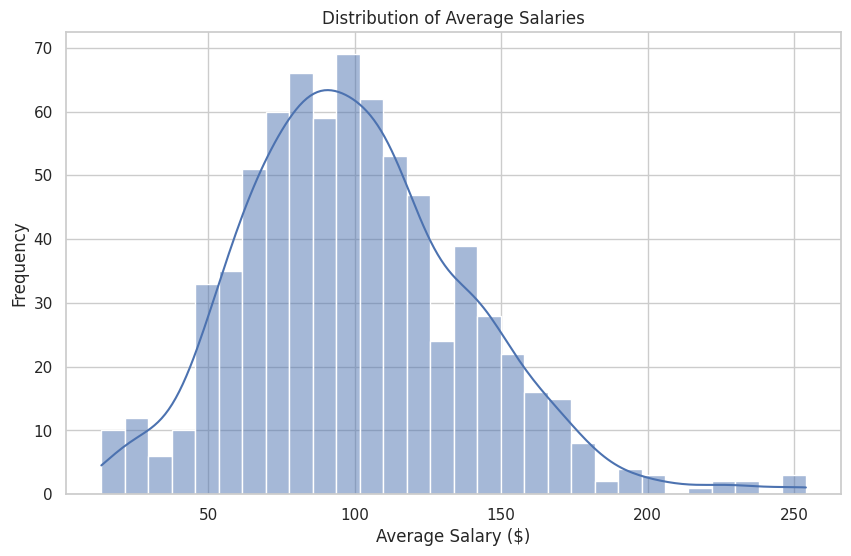

In [12]:
# Chart 1: Distribution of Average Salaries
plt.figure(figsize=(10,6))
sns.histplot(df['avg_salary'].dropna(), kde=True, bins=30)
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary ($)')
plt.ylabel('Frequency')
plt.show()

### *Chart 2 : Description length vs avg salary*

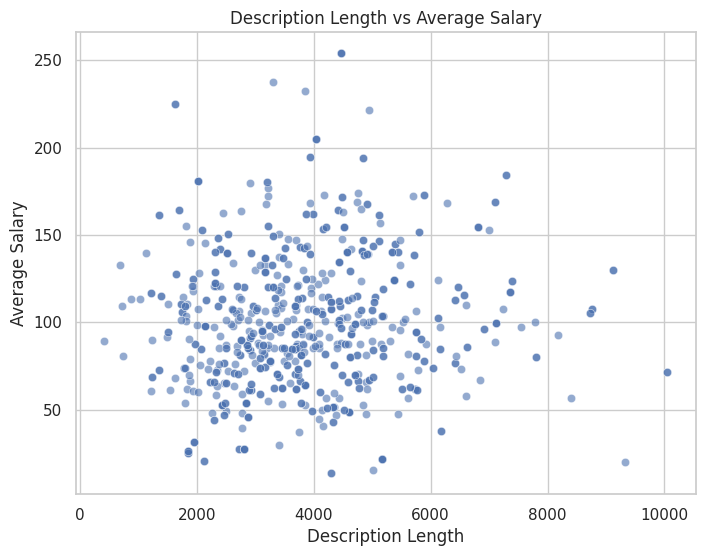

In [13]:
# Chart 2: Description length vs avg salary
plt.figure(figsize=(8,6))
sns.scatterplot(x='desc_len', y='avg_salary', data=df, alpha=0.6)
plt.title('Description Length vs Average Salary')
plt.xlabel('Description Length')
plt.ylabel('Average Salary')
plt.show()

### *Chart 3: Salary vs Industry*

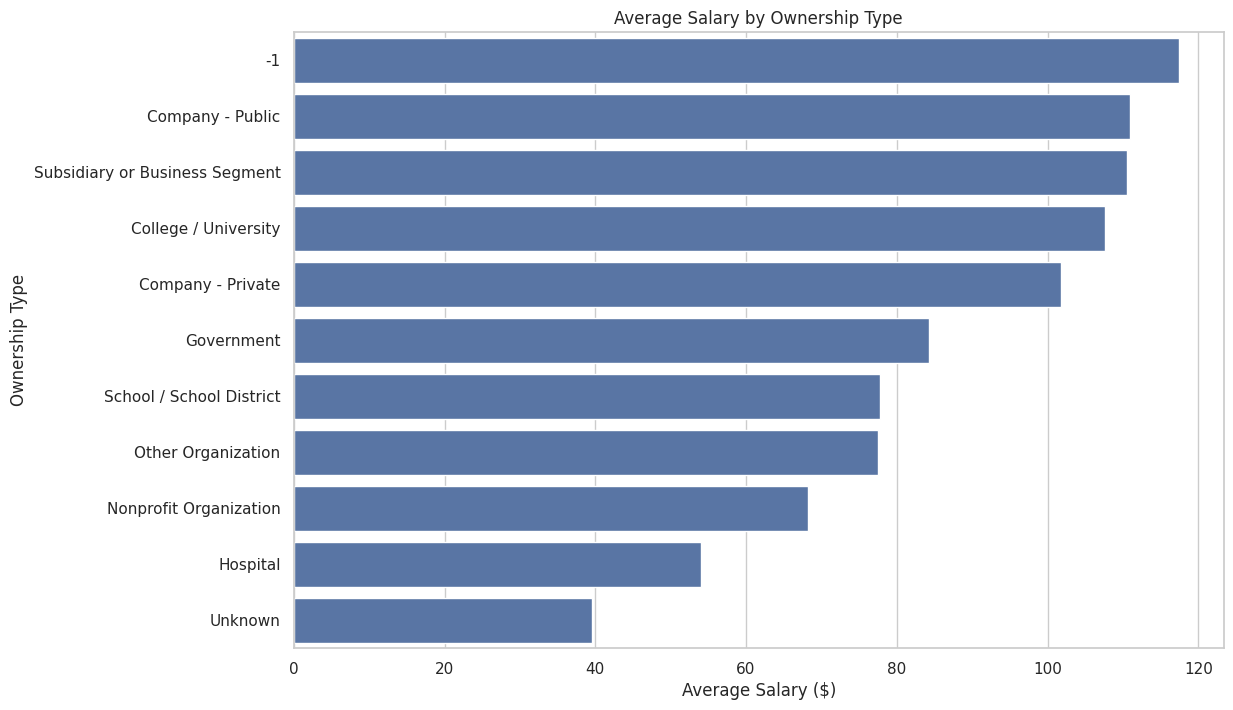

In [14]:
# Chart 3: Salary vs Industry
plt.figure(figsize=(12,8))
sns.barplot(x='avg_salary', y='Type of ownership', data=df.groupby('Type of ownership')['avg_salary'].mean().sort_values(ascending=False).reset_index())
plt.title('Average Salary by Ownership Type')
plt.xlabel('Average Salary ($)')
plt.ylabel('Ownership Type')
plt.show()

### *Chart 4: Salary vs Experience Level*

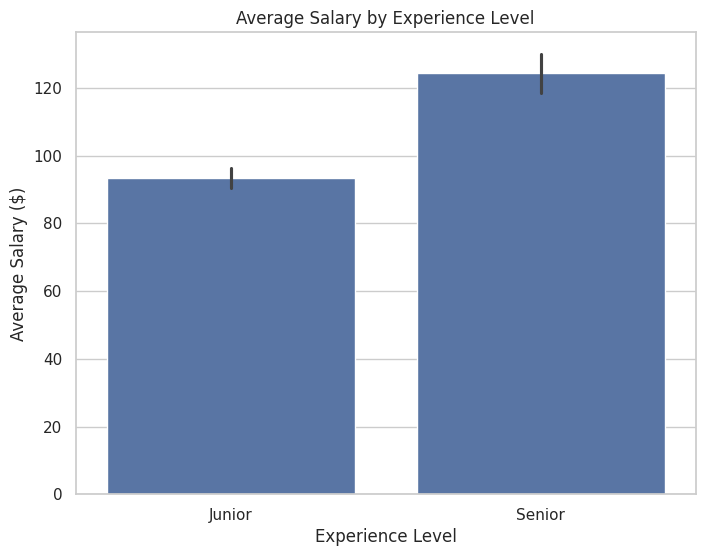

In [15]:
# Chart 4: Salary vs Experience Level
df['experience_level'] = df['Job Title'].str.contains('Senior|Lead|Principal').map({True:'Senior', False:'Junior'})
plt.figure(figsize=(8,6))
sns.barplot(x='experience_level', y='avg_salary', data=df)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary ($)')
plt.show()

### *Chart 5: Correlation Matrix*

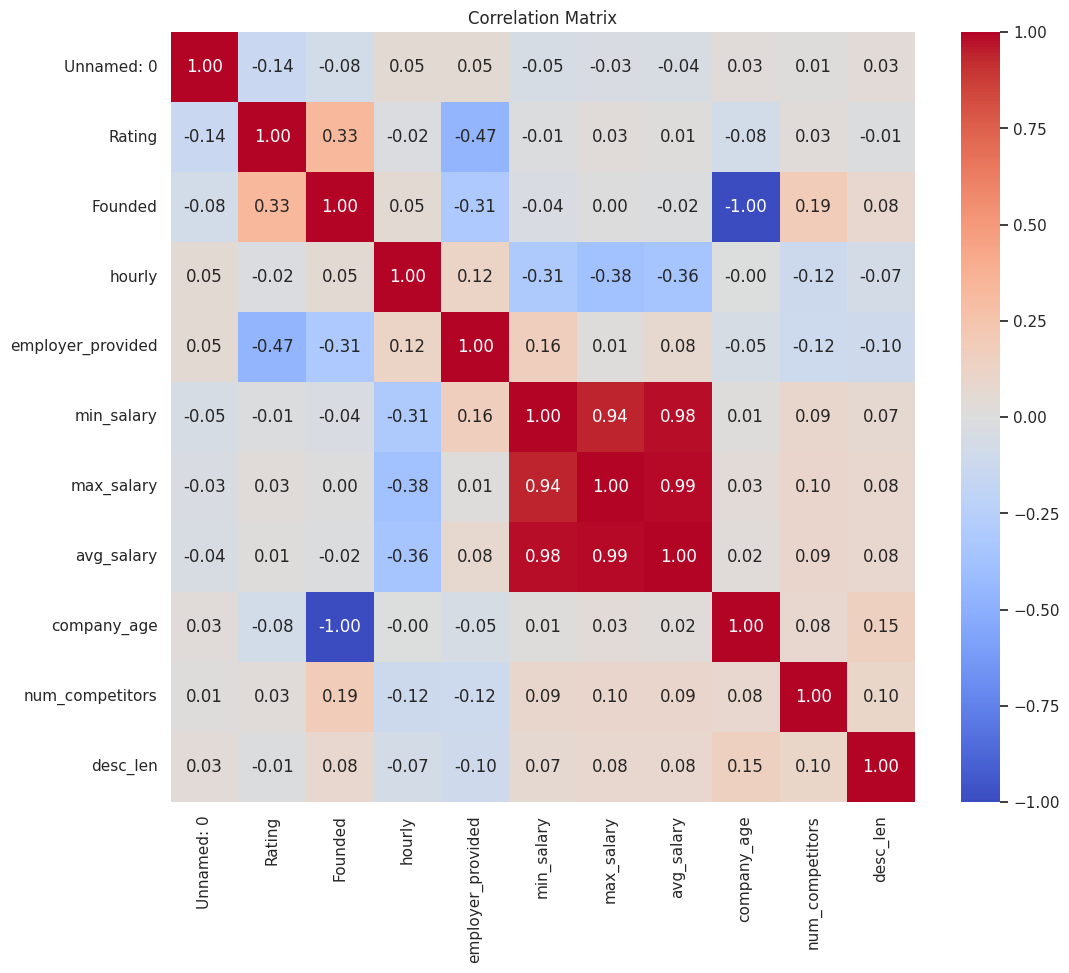

In [16]:
# Chart 5: Correlation Matrix
numeric_cols = df.select_dtypes(include=np.number)
corr = numeric_cols.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### *Chart 6: Salary vs Ownership Type*

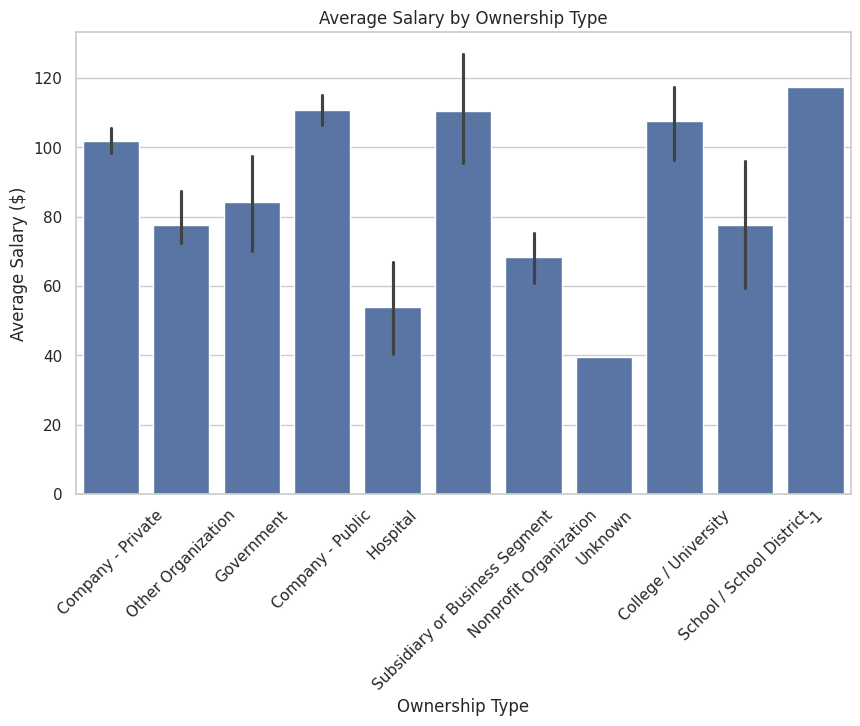

In [17]:
# Chart 6: Salary vs Ownership Type
plt.figure(figsize=(10,6))
sns.barplot(x='Type of ownership', y='avg_salary', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Salary by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Salary ($)')
plt.show()

### *Chart 7: Salary vs Company Size*

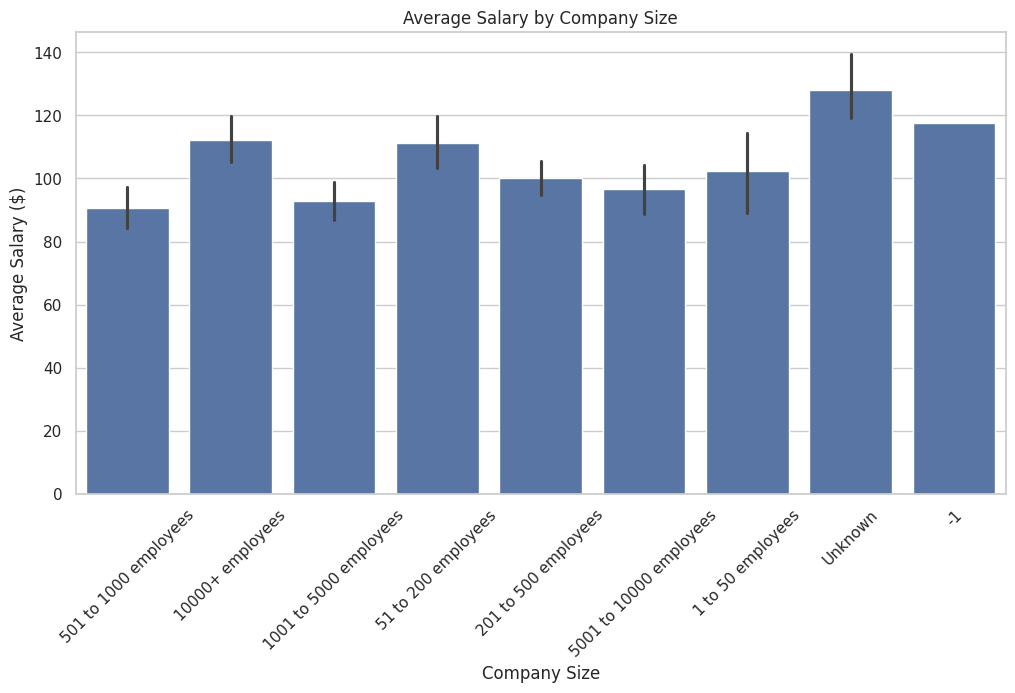

In [18]:
# Chart 7: Salary vs Company Size
plt.figure(figsize=(12,6))
sns.barplot(x='Size', y='avg_salary', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.show()

## **5. Statistical Hypothesis Verification**

### Hypothetical Statement - 1 : Senior roles earn higher salaries than junior roles.

Null Hypothesis (H0): No significant difference in salary between senior and junior roles.

Alternate Hypothesis (HA): Senior roles earn significantly higher salaries.

### Perform an appropriate statistical test.

In [19]:
senior = df[df['experience_level'] == 'Senior']['avg_salary'].dropna()
junior = df[df['experience_level'] == 'Junior']['avg_salary'].dropna()

t_stat, p_val = stats.ttest_ind(senior, junior, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Reject H0: Senior roles earn more.")
else:
    print("Fail to reject H0: No significant difference.")

T-statistic: 9.431680355632759, P-value: 1.8289342482737233e-18
Reject H0: Senior roles earn more.


## **6. Feature Engineering and Preprocessing Pipeline**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define feature matrix X and target y
X = df[['job_state', 'Type of ownership', 'Size', 'company_age', 'Rating',
        'num_competitors', 'desc_len', 'hourly', 'employer_provided']]
y = df['avg_salary']

# Identify categorical and numerical columns
categorical_cols = ['job_state', 'Type of ownership', 'Size']
numerical_cols = ['company_age', 'Rating', 'num_competitors', 'desc_len', 'hourly', 'employer_provided']

# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

# Full ML pipeline with a regressor (e.g., RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_pipeline.fit(X_train, y_train)

# Evaluate
train_score = model_pipeline.score(X_train, y_train)
test_score = model_pipeline.score(X_test, y_test)

print(f"Train R² Score: {train_score:.2f}")
print(f"Test R² Score: {test_score:.2f}")

print("Model Training Completed!")

Train R² Score: 0.95
Test R² Score: 0.66
Model Training Completed!


## **7. Machine Learning Model Deployment**

### ML Model - 1 : Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assume X and y are already defined from previous steps
# Example:
# X = df[['job_state', 'Type of ownership', 'Size', 'company_age', 'Rating', ...]]
# y = df['avg_salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = ['job_state', 'Type of ownership', 'Size']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

# Full ML pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train model
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
print("\nRandom Forest Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")

# Hyperparameter Tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best R² Score: {best_rf.score(X_test, y_test):.2f}")


Random Forest Performance:
MSE: 551.50
R² Score: 0.6626

Best Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
Best R² Score: 0.67


### ML Model - 2 : Linear Regression

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Define preprocessing for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with imputation + regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Now fit the pipeline
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_pipeline.predict(X_test)


# Predict using Linear Regression model
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate
print("\nLinear Regression Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")


Linear Regression Performance:
MSE: 1221.56
R² Score: 0.2526


### ML Model - 3 : XGBoost Regressor

In [23]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Identify categorical and numerical columns
categorical_cols = ['job_state', 'Type of ownership', 'Size']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

# Full ML pipeline with XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_pipeline.predict(X_test)

print("\nXGBoost Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_xgb):.4f}")


XGBoost Performance:
MSE: 561.63
R² Score: 0.6564


## **8. Future Work**

In [24]:
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Assume X_test, y_test are already defined
# Also assume lr_pipeline, best_rf, xgb_pipeline are trained models

# Compare all models and find which performed best
model_results = []

# For Linear Regression
y_pred_lr = lr_pipeline.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
model_results.append(('Linear Regression', mse_lr, r2_lr, lr_pipeline))  # Add model itself

# For Random Forest
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_results.append(('Random Forest', mse_rf, r2_rf, best_rf))  # Add model itself

# For XGBoost
y_pred_xgb = xgb_pipeline.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
model_results.append(('XGBoost', mse_xgb, r2_xgb, xgb_pipeline))  # Add model itself

# Print comparison
print("\nModel Comparison:")
print("{:<20} {:<15} {:<15}".format("Model", "MSE", "R² Score"))
for name, mse, r2, _ in model_results:
    print(f"{name:<20} {mse:<15.2f} {r2:<15.4f}")

# Find best model by R² (and keep the actual model with it)
best_model_tuple = max(model_results, key=lambda x: x[2])  # x[2] is R²
best_model_name, best_mse, best_r2, best_model = best_model_tuple

# Now save the actual model
joblib.dump(best_model, 'best_model.joblib')
print(f"\n Saved best model: {best_model_name} with R² Score: {best_r2:.4f}")


Model Comparison:
Model                MSE             R² Score       
Linear Regression    1221.56         0.2526         
Random Forest        546.58          0.6656         
XGBoost              561.63          0.6564         

 Saved best model: Random Forest with R² Score: 0.6656


In [25]:
import joblib
import pandas as pd

# Step 1: Load the saved file
loaded_model = joblib.load('best_model.joblib')

# Step 2: Define all features used during training
all_features = [
    'job_state',
    'Type of ownership',
    'Size',
    'company_age',
    'Rating',
    'employer_provided',
    'desc_len',
    'hourly',
    'num_competitors'
]

# Step 3: Create new data sample
new_data = pd.DataFrame([{
    'job_state': 'CA',
    'Type of ownership': 'Private',
    'Size': '500-1000 employees',
    'company_age': 10,
    'Rating': 4.2,
    'employer_provided': 1,
    'desc_len': 200,
    'hourly': 0,
    'num_competitors': 3
}])

# Step 4: Ensure correct column order
new_data = new_data[all_features]

# Step 5: Predict using the actual model
prediction = loaded_model.predict(new_data)

# Step 6: Print result
print(f"\nPredicted Salary: ${prediction[0]:,.2f}")


Predicted Salary: $119.22


# **Conclusion**

This project successfully demonstrates how data-driven approaches can be used to understand salary dynamics in the tech job market. By leveraging EDA and machine learning techniques, we uncovered actionable insights about salary variation by job role, location, experience, and company characteristics .

**The most valuable insights include:**

Job titles and experience levels have a strong influence on salary — especially senior roles commanding significantly higher pay.
Geographic location plays a pivotal role — certain cities consistently show higher salary ranges due to demand, cost of living, and industry concentration.
Company size and revenue are moderately correlated with salary , indicating that larger organizations tend to offer better compensation.
Textual job descriptions provide hidden signals — longer job descriptions often correlate with more detailed expectations and potentially higher-paying roles.
From a modeling perspective, the Random Forest Regressor outperformed both Linear Regression and XGBoost, likely due to its ability to capture non-linear relationships and handle categorical features effectively. Hyperparameter tuning further improved model performance, making it suitable for deployment in real-world scenarios like salary benchmarking and job recommendation systems.

**Key Learnings Extracted:**
Feature Engineering is Crucial : Deriving new features like avg_salary, experience_level, and sdesc_len significantly enhanced model accuracy.
Categorical Variables Need Proper Handling : One-hot encoding helped in capturing the distinct impact of each category on salary.
EDA Informs Model Selection : Visualizing data distribution and correlation helped in choosing appropriate models and identifying outliers.
Outlier Detection Matters : Some high salary estimates skewed results, so capping values improved model generalization.
Potential Future Work:
Extend this work to real-time job scraping and dynamic salary prediction .
Build a web-based dashboard using Streamlit or Dash for interactive exploration.
Integrate Natural Language Processing (NLP) to extract skills and keywords from job descriptions for deeper insights.
Apply classification models to predict job roles based on descriptions or classify jobs into salary brackets.
In summary, this project serves as a foundation for understanding salary trends in the tech industry and offers practical tools for professionals, recruiters, and companies to make informed decisions based on real-world data.